## O Danych

Zbiór danych zawiera informacje o trzech gatunkach irysów: **Iris setosa**, **Iris versicolor**, i **Iris virginica**.

Dane obejmują pomiary czterech cech: długość i szerokość działki kielicha oraz długość i szerokość płatka.

Każdy wiersz w zbiorze danych reprezentuje pojedynczy kwiat, a wartości pomiarów są podane w centymetrach.

Zbiór składa się z 150 próbek, po 50 dla każdego gatunku, i jest szeroko stosowany jako podstawowy zbiór danych do
testowania algorytmów klasyfikacji oraz w nauce o danych i uczeniu maszynowym.

Kolumny:
* **długość kielicha (sepal length)** - Długość kielicha w cm
* **szerokość kielicha (sepal width)** - Szerokość kielicha w cm
* **długość płatka (petal length)** - Długość płatka w cm
* **szerokość płatka (petal width)** - Szerokość płatka w cm
* **klasa (class)** - Klasa irysa (setosa, versicolor, virginica)

## Czynności przygotowawcze

Zanim przystąpimy do analizy zbioru danych, zaimportujmy bibliotekę pandas oraz wczytajmy plik z danymi do tabeli o standardowej nazwie df.

In [37]:
import pandas as pd

In [38]:
df = pd.read_csv('25__iris.csv', sep=",")
df

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width),klasa (class)
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Ogólny przegląd danych

Dowiedzmy się czegoś więcej o naszych danych.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   długość kielicha (sepal length)   150 non-null    float64
 1   szerokość kielicha (sepal width)  150 non-null    float64
 2   długość płatka (petal length)     150 non-null    float64
 3   szerokość płatka (petal width)    150 non-null    float64
 4   klasa (class)                     150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Zbiór danych zawiera 150 pozycji (rekordów). Są one uporządkowane w pięciu kolumnach zawierających następujące informacje:
1. długość kielicha
2. szerokość kielicha
3. długość płatka
4. szerokość płatka
5. klasa

Zobaczmy trochę przykładowych rekordów.

In [41]:
df.sample(9)

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width),klasa (class)
28,5.2,3.4,1.4,0.2,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
117,7.7,3.8,6.7,2.2,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica
43,5.0,3.5,1.6,0.6,Iris-setosa
147,6.5,3.0,5.2,2.0,Iris-virginica
68,6.2,2.2,4.5,1.5,Iris-versicolor
66,5.6,3.0,4.5,1.5,Iris-versicolor
29,4.7,3.2,1.6,0.2,Iris-setosa


Widzimy, że każdy z rekordów jest dodatkowo opatrzony indeksem. Dowiedzmy się o nim nieco więcej.

In [42]:
df.index

RangeIndex(start=0, stop=150, step=1)

Widzimy, że wartości indeksu przyjmują wartości całkowite od 0 do prawdopodobnie 149, zwiększając się kolejno o 1.

Zagłębmy się w analizowany zbiór danych nieco bardziej.

In [43]:
df.nunique()

długość kielicha (sepal length)     35
szerokość kielicha (sepal width)    23
długość płatka (petal length)       43
szerokość płatka (petal width)      22
klasa (class)                        3
dtype: int64

W tych informacjach znajdujemy potwierdzenie, że zbiór zawiera dane o trzech klasach kwiatów. Długość kielicha i szerokość kielicha oraz długość i szerokość płatka przyjmują różne wartości.

## Analiza brakujących wartości

Teraz sprawdźmy, czy w zbiorze danych nie brakuje jakichś wartości.

In [44]:
df.isnull().sum()

długość kielicha (sepal length)     0
szerokość kielicha (sepal width)    0
długość płatka (petal length)       0
szerokość płatka (petal width)      0
klasa (class)                       0
dtype: int64

Okazuje się, że w naszym zbiorze danych wszystkie pola zawierają dane - nie brakuje żadnych wartości.

W takim razie dowiedzmy się więcej zakresach przyjmowanych wartości.

In [45]:
df.describe()

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Długość kielicha przyjmuje wartości od 4.3 do 7.9, a jego szerokość od 2.0 do 4.4.
Z kolei długość płatka waha się pomiędzy 1.0 i 6.9, a jego szerokość od 0.1 do 2.5.

Wydaje się, że długość i szerokość kielicha przyjmują wartości bardzo prawdopodobne, o stosunkowo niewielkim stopniu rozproszenia.
Dane dotyczące płatka przyjmują znacznie szerszy (szczególnie od dołu) zakres wartości. Wymagają one nieco dokładniejszej analizy w zakresie wartości odstających, chociaż z drugiej strony trzeba uwzględnić fakt, że mamy do czynienia z trzema różnymi klasami kwiatów i z tego powodu takie różnice mogą być uzasadnione.

## Analiza pojedynczych zmiennych

Narysujemy teraz histogramy dla poszczególnych danych liczbowych.

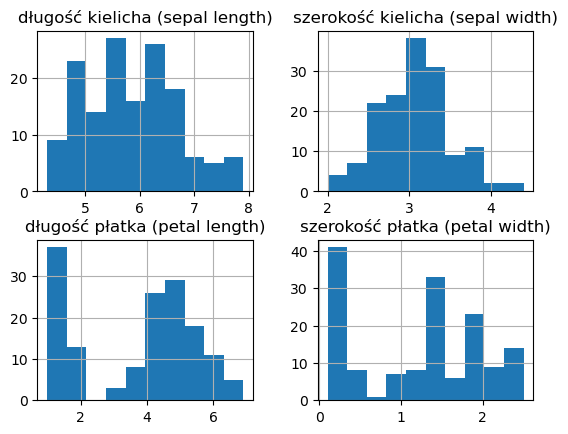

In [46]:
df.hist();

Na podstawie powyższych wykresów możemy przypuszczać, że wszystkie trzy klasy irysów mają podobną szerokość kielicha. Poszczególne klasy irysów prawdopodobnie różnią się między sobą długością kielich i szerokością płatka. Dwie klasy irysów mają najprawdopodobniej zbliżoną do siebie długość płatka, a jedna klasa ma długość płatka zdecydowanie mniejszą niż dwie pozostałe.

Przyjrzyjmy się rozkładowi tych danych dla poszczególnych klas.

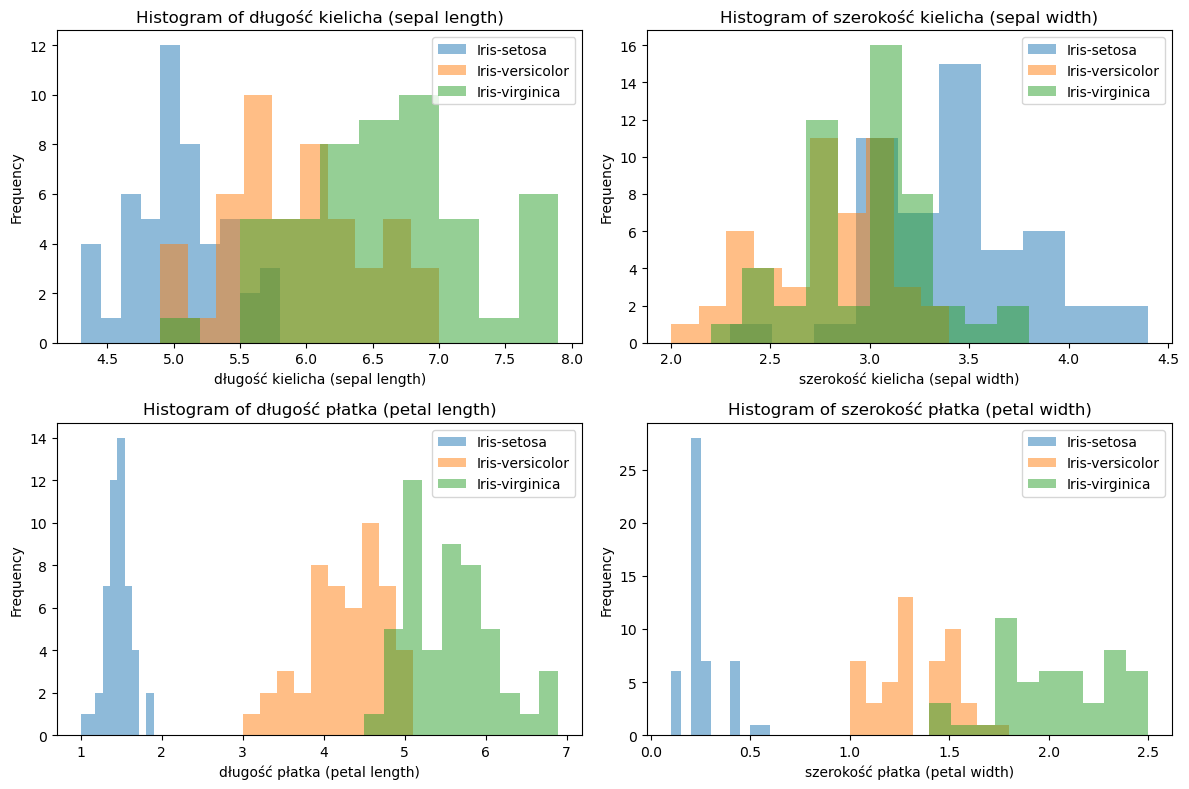

In [47]:
import matplotlib.pyplot as plt

# Plot histograms for each feature, separated by class
features = ['długość kielicha (sepal length)', 'szerokość kielicha (sepal width)','długość płatka (petal length)', 'szerokość płatka (petal width)']
classes = df['klasa (class)'].unique()

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

for i, feature in enumerate(features):
    for cls in classes:
        subset = df[df['klasa (class)'] == cls]
        axes[i].hist(subset[feature], alpha=0.5, label=cls)
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

plt.tight_layout()
plt.savefig("class_histograms.png")

Powyższe wykresy potwierdzają nasze przypuszczenia, że poszczególne klasy irysów wyróżniają takie cechy, jak długość kielicha, a przede wszystkim długość i szerokość płatka. Szerokość kielicha jest cechą w najmniejszym stopniu wyróżniającą poszczególne klasy.

Przyjrzyjmy się dokładniej wartościom średnim wymiarów kielicha i płatka dla poszczególnych klas.

In [73]:
klasy = df["klasa (class)"].unique()
for klasa in klasy:
   print(klasa)
   print(df[df["klasa (class)"] == klasa].mean(numeric_only = True).round(1))

Iris-setosa
długość kielicha (sepal length)     5.0
szerokość kielicha (sepal width)    3.4
długość płatka (petal length)       1.5
szerokość płatka (petal width)      0.2
dtype: float64
Iris-versicolor
długość kielicha (sepal length)     5.9
szerokość kielicha (sepal width)    2.8
długość płatka (petal length)       4.3
szerokość płatka (petal width)      1.3
dtype: float64
Iris-virginica
długość kielicha (sepal length)     6.6
szerokość kielicha (sepal width)    3.0
długość płatka (petal length)       5.6
szerokość płatka (petal width)      2.0
dtype: float64


Zobrazujmy to na wykresie słupkowym.

<Figure size 1000x600 with 0 Axes>

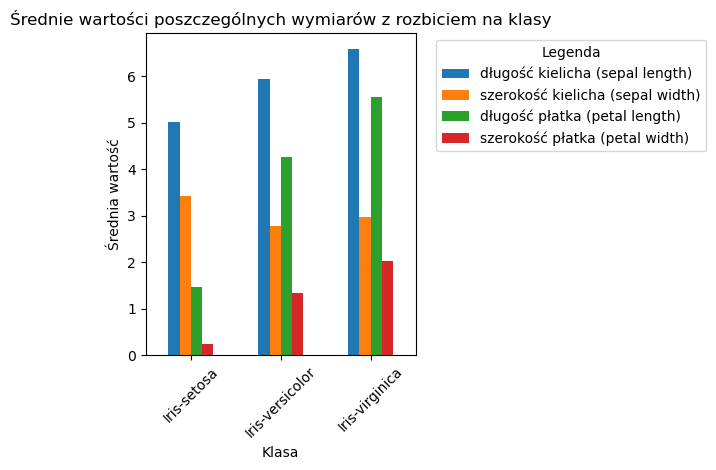

In [64]:
# Calculate the mean values for each class
mean_values = df.groupby('klasa (class)').mean()

# Plotting
fig = plt.figure(figsize=(10, 6))
mean_values.plot(kind='bar')
plt.title('Średnie wartości poszczególnych wymiarów z rozbiciem na klasy')
plt.xlabel('Klasa')
plt.ylabel('Średnia wartość')
plt.xticks(rotation=45)
plt.legend(title='Legenda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

# Save the plot as a PNG file
# plot_filename = 'average_values_by_class.png';
# plt.savefig(plot_filename);

Uzyskaliśmy zatem średnie wartości wymiarów kielicha i płatka dla trzech klas irysów:
Irys Setosa: długość i szerokość kielicha: 5.0 x 3.4 cm oraz długość i szerokość płatka: 4.3 x 1.3 cm
oraz odpowiednio
Irys Versicolor: 5.9 x 2.8 cm oraz 4.3 x 1.3 cm,
Irys Virginica: 6.6 x 3.00 oraz 5.6 x 2.0 cm.

Wniosek:
Biorąc pod uwagę wymiary kielicha i płatka, klasę irysów najlepiej identyfikować po długości i szerokości płatka. Te dwa wymiary są najbardziej zróżnicowane pomiędzy poszczególnymi gatunkami. Średnia długość kielicha również jest zróżnicowana, ale już w znacznie mniejszym stopniu. Najmniej zróżnicowana jest szerokość kielicha.

## Transformacja danych

Dane wydają się wysokiej jakości. Nie ma danych brakujących, a rozproszenie danych, przynajmniej intuicyjnie, również nie jest duże. 
Z tego powodu transformacja samych danych nie wydaje się potrzebna.
Niewygodne są natomiast długie, dwujęzyczne nazwy poszczególnych kolumn. Ponieważ pracujemy w języku polskim, dla ułatwienia analizy danych w przyszłości, warto zmienić nazwy kolumn, co uczynimy poniżej.

In [24]:
df.rename(columns={
    'długość kielicha (sepal length)': 'długość kielicha',
    'szerokość kielicha (sepal width)': 'szerokość kielicha',
    'długość płatka (petal length)': 'długość płatka',
    'szerokość płatka (petal width)': 'szerokość płatka'
}, inplace=True)

Zapomnieliśmy o zmianie nazwy jeszcze jednej kolumny. Uczyńmy to więc teraz.

In [25]:
df.rename(columns={
    'klasa (class)' : 'klasa'
}, inplace=True)

Sprawdźmy, czy udało się wprowadzić nowe nazwy kolumn.

In [26]:
df.columns

Index(['długość kielicha', 'szerokość kielicha', 'długość płatka',
       'szerokość płatka', 'klasa'],
      dtype='object')

Nowe nazwy kolumn stały się faktem. Przekopiujmy całą tabelę z polskimi nazwami kolumn do nowej tabel o nazwie dfpl.

In [27]:
dfpl = df.copy()

## Analiza relacji między zmiennymi

Przyjrzymy się teraz korelacji pomiędzy długością i szerokością kielicha w całym zbiorze irysów.

In [28]:
dfpl[["długość kielicha", "szerokość kielicha"]].corr()

,długość kielicha,szerokość kielicha
długość kielicha,1.000000,-0.109369
szerokość kielicha,-0.109369,1.000000


Jak widzimy, pomiędzy tymi wielkościami występuje delikatna korelacja ujemna.

A teraz spójrzymy jeszcze na korelację pomiędzy długością i szerokością płatka, również w całym zbiorze irysów.

In [29]:
dfpl[["długość płatka", "szerokość płatka"]].corr()

,długość płatka,szerokość płatka
długość płatka,1.000000,0.962757
szerokość płatka,0.962757,1.000000


Te wielkości, jak widać, są ze sobą silnie skorelowane.

## Analiza wartości odstających

Zweryfikujmy jeszcze, czy nasze pierwotne przypuszczenie o wysokiej jakości danych i małej liczbie wartości odstających było słuszne.
W tym celu posłużymy się wykresami pudełkowymi dla każdego z wymiarów w obrębie każdej z klas.

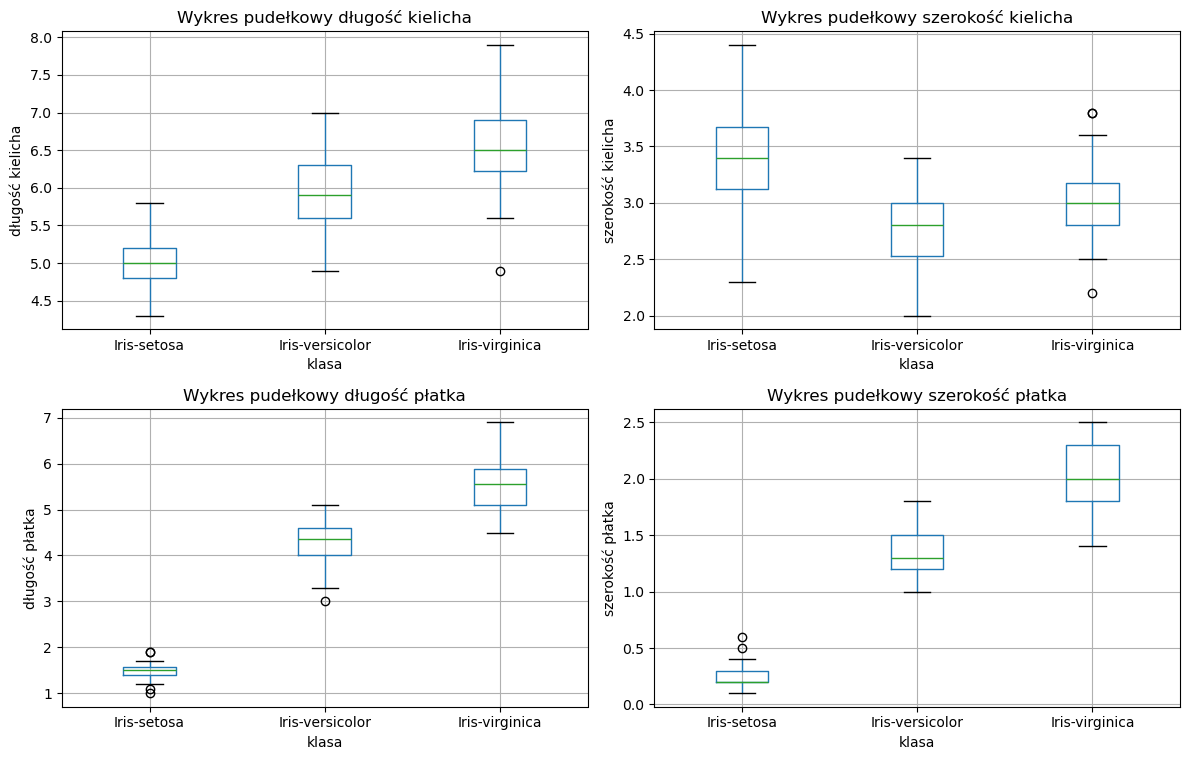

In [30]:
# Import the required dependencies
import matplotlib.pyplot as plt

# Create a list of features to plot
features = ['długość kielicha', 'szerokość kielicha', 'długość płatka', 'szerokość płatka']

# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the features and create a boxplot for each
for i, feature in enumerate(features):
    dfpl.boxplot(column=feature, by='klasa', ax=axes[i])
    axes[i].set_title(f'Wykres pudełkowy {feature}')
    axes[i].set_xlabel('klasa')
    axes[i].set_ylabel(feature)

# Adjust layout
plt.tight_layout()
plt.suptitle('')  # Remove the default suptitle to avoid overlap

# Save the plot as a PNG file
plt.savefig('boxplots.png')

Najwięcej wartości odstających (5, czyli 10% zbioru danych w obrębie danej klasy) występuje dla Irysów Setosa. Wydaje się jednak, że wartości odstające są tu stosunkowo niewielkie, a do tego częściowo rozłożone równomiernie wokół mediany, więc należy przypuszczać, że mają one niewielki wpływ na wnioski wynikające z analizy. Co więcej, takiej odchylenia wydają się w przyrodzie jak najbardziej naturalne. Z tego powodu ich odrzucenie lub próba korekty byłyby wręcz błędem. Podobne spostrzeżenia odnośnie wartości odstających co dla Irysa Setosy można także wyciągnąć dla Irysa Virginica, z tym, ze dla nich liczba wartości odstających jest jeszcze niższa (odpowiednio 3 i 1).

## Wnioski końcowe

Analizowany zbiór danych Irysów zawiera dane o wymiarach kielichów i płatków 150 Irysów należących do 3 klas tych roślin (po 50 sztuk z każdej klasy). Wydaje się on zbiorem wysokiej jakości - nie brakuje w nim danych, a liczba wartości odstających (jeśli w ogóle możemy je tak określić) jest niewielka.

Z analizy wyciągnęliśmy wniosek, że biorąc pod uwagę wymiary kielicha i płatka, klasę irysów najlepiej identyfikować po długości i szerokości płatka. Te dwa wymiary są najbardziej zróżnicowane pomiędzy poszczególnymi klasami. Średnia długość kielicha również jest zróżnicowana, ale już w znacznie mniejszym stopniu. Najmniej zróżnicowana jest szerokość kielicha.

W całym zbiorze Irysów występuje niewielka korelacja ujemna pomiędzy długością i szerokością kielicha - w zasadzie można nawet przyjąć, że tej korelacji nie ma. Z kolei występuję tu bardzo silna korelacja pomiędzy długością i szerokością płatka. 

W trakcie analizy dokonaliśmy zmiany nazw kolumn tabeli danych na nazwy bardziej wygodne w analizie. Zmiany tej dokonaliśmy bezpośrednio w tabeli pierwotnej. Utrudniło to jednak redakcję samego dokumentu, gdyż po zmianie nazw kolumn tabeli pierwotnej nie można już było wykonywać niektórych wcześniej zdefiniowanych odnoszących się do niej poleceń. W przyszłości lepiej w takim przypadku dokonać zmiany nazw kolumn już na samym początku analizy i ewentualnie także przekopiować dane do nowej tabeli o innej nazwie. My uczyniliśmy to jednak dopiero na dalszym etapie.

In [1]:
!jupyter nbconvert iris.ipynb --to html --no-input --no-prompt


[NbConvertApp] Converting notebook iris.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 582893 bytes to iris.html
